In [1]:
import numpy as np
import mne
from scipy.signal import hilbert
from mne.stats import permutation_cluster_test
from statsmodels.stats.multitest import fdrcorrection
from src.utils.logger import create_logger
from src.utils.data import load_yaml

In [2]:
hf_band = (70, 150)           # high-frequency / high-gamma band for EMG proxy
baseline = (-0.5, -0.1)       # baseline window in seconds (pre-stim/trial)
analysis_window = (0.0, 0.6)  # analysis window relative to epoch/event
ch_names = ['T7', 'T8', 'FT7', 'FT8']
n_permutations = 1000 

In [3]:
config = 'config.yaml'
config = load_yaml(config)
logger = create_logger('test')


In [5]:
reader = BIDSDatasetReader(
    logger=logger, config=config, subject='01', session='01'
)

[2025-11-27 10:56:52] [INFO] ************************************************************
[2025-11-27 10:56:52] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-27 10:56:52] [INFO] ************************************************************


In [6]:
reader._load_raw()

[2025-11-27 10:56:53] [INFO] Loading raw EEG data


Reading 0 ... 6306999  =      0.000 ...  6306.999 secs...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:44: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['EOG1', 'EOG2']
  self.raw_eeg = read_raw_bids(self.bidspath, verbose=False)
[2025-11-27 10:57:01] [INFO] Data read sucessfully


In [7]:
eeg = reader.raw_eeg

In [8]:
eeg.annotations[0]

OrderedDict([('onset', np.float64(16.301)),
             ('duration', np.float64(0.0)),
             ('description',
              np.str_('SilentSyllablesPracticeStartFixation:Text_FAS')),
             ('orig_time',
              datetime.datetime(2024, 7, 4, 8, 5, 45, tzinfo=datetime.timezone.utc)),
             ('extras', {})])

In [9]:
from src.dataset.eeg_epoch_builder import EEGEpochBuilder
ch_names = ['T7', 'T8', 'FT7', 'FT8']
baseline={'tmin':-0.2, 'tmax':0.0}


In [10]:
overt = EEGEpochBuilder(
    eeg_data=eeg,
    trial_mode='Real', trial_unit='Words',
    trial_boundary='Start', 
    experiment_mode='Experiment', 
    trial_type='Speech',
    modality='',
    channels=ch_names, logger=logger
)

covert = EEGEpochBuilder(
    eeg_data=eeg,
    trial_mode='Silent', trial_unit='Words',
    trial_boundary='Start', 
    experiment_mode='Experiment', 
    trial_type='Speech',
    modality='',
    channels=ch_names, logger=logger
)

rest = EEGEpochBuilder(
    eeg_data=eeg,
    trial_mode='', trial_unit='Words',
    trial_boundary='Start', 
    experiment_mode='Experiment', 
    trial_type='Fixation',
    modality='',
    channels=ch_names, logger=logger
)

[2025-11-27 10:57:23] [INFO] ************************************************************
[2025-11-27 10:57:23] [INFO] **********Initializing Epoch Builder**********
[2025-11-27 10:57:23] [INFO] ************************************************************
[2025-11-27 10:57:23] [INFO] ************************************************************
[2025-11-27 10:57:23] [INFO] **********Initializing Epoch Builder**********
[2025-11-27 10:57:23] [INFO] ************************************************************
[2025-11-27 10:57:23] [INFO] ************************************************************
[2025-11-27 10:57:23] [INFO] **********Initializing Epoch Builder**********
[2025-11-27 10:57:23] [INFO] ************************************************************


In [12]:
overt_epochs = overt.create_epochs(tmin=-0.2, tmax=1.5)
covert_epochs = covert.create_epochs(tmin=-0.2, tmax=1.5)
rest_epochs = rest.create_epochs(tmin=-0.2, tmax=1.5)

[2025-11-27 10:58:34] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Speech     ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 1.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
255 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 255 events and 1701 original time points ...
0 bad epochs dropped


[2025-11-27 10:58:34] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Speech     ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 1.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
255 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 255 events and 1701 original time points ...
0 bad epochs dropped


[2025-11-27 10:58:35] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 1.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
510 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 510 events and 1701 original time points ...
0 bad epochs dropped


In [13]:
hf_band = (70, 150)   
baseline = (-0.5, -0.1)       # baseline window in seconds (pre-stim/trial)
sfreq = covert_epochs.info['sfreq']
analysis_window = (0.0, 0.6)  # analysis window relative to epoch/event

sfreq

1000.0

In [14]:
def bandpass_and_power(epochs, l_freq, h_freq):
    data = epochs.get_data()  # shape (n_epochs, n_channels, n_times)
    # bandpass in-place using MNE filter (zero-phase)
    # MNE filter works on (n_channels, n_times) arrays per epoch; we'll apply across epochs vectorized
    n_epochs, n_ch, n_times = data.shape
    data_reshaped = data.reshape(n_epochs * n_ch, n_times)
    # apply filter
    filt = mne.filter.filter_data(data_reshaped, sfreq=sfreq, l_freq=l_freq, h_freq=h_freq,
                                  verbose=False, method='fir')  # use fir for stability
    filt = filt.reshape(n_epochs, n_ch, n_times)
    # Hilbert -> analytic -> power
    analytic = hilbert(filt, axis=-1)
    power = np.abs(analytic) ** 2
    return power  # shape (n_epochs, n_ch, n_times)

In [15]:
overt_power = bandpass_and_power(overt_epochs, hf_band[0], hf_band[1])
covert_power = bandpass_and_power(covert_epochs, hf_band[0], hf_band[1])
rest_power = bandpass_and_power(rest_epochs, hf_band[0], hf_band[1])

In [16]:
def baseline_zscore(power, times, baseline_window):
    bmin, bmax = baseline_window
    bidx = np.where((times >= bmin) & (times <= bmax))[0]
    if len(bidx) == 0:
        raise ValueError("Baseline window matches no time points.")
    # compute mean/std across baseline samples for each epoch+channel
    baseline_mean = power[:, :, bidx].mean(axis=-1, keepdims=True)  # shape (n_epochs, n_ch, 1)
    baseline_std  = power[:, :, bidx].std(axis=-1, keepdims=True)   # shape (n_epochs, n_ch, 1)
    # avoid divide by zero
    baseline_std[baseline_std == 0] = 1e-12
    z = (power - baseline_mean) / baseline_std
    return z

In [17]:
times = overt_epochs.times
overt_power.shape

(255, 4, 1701)

In [18]:
overt_z = baseline_zscore(overt_power, times, baseline)
covert_z = baseline_zscore(covert_power, times, baseline)
rest_z = baseline_zscore(rest_power, times, baseline)


In [20]:
aidx = np.where((times >= analysis_window[0]) & (times <= analysis_window[1]))[0]
times_a = times[aidx]

In [21]:
results = {}
for ch_idx, ch in enumerate(ch_names):
    X = [overt_z[:, ch_idx, aidx], covert_z[:, ch_idx, aidx]]  # list of arrays (n_epochs, n_times)
    # permutation_cluster_test expects (samples, times) arrays; we give them as the two-group list
    T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
        X, n_permutations=n_permutations, tail=0, n_jobs=1, seed=42, out_type='mask'
    )
    results[ch] = dict(
        T_obs=T_obs,
        clusters=clusters,
        cluster_p_values=cluster_p_values
    )


Using a threshold of 3.859829
stat_fun(H1): min=8.113064830878866e-07 max=8.067398934602743
Running initial clustering …
Found 12 clusters


/tmp/ipykernel_383123/3658073049.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
/home/owaismujtaba/anaconda3/envs/mind/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Permuting : 999/999 [00:00<00:00, 2277.22it/s]

Using a threshold of 3.859829
stat_fun(H1): min=1.962304999623267e-05 max=12.960383807781499
Running initial clustering …
Found 19 clusters



/tmp/ipykernel_383123/3658073049.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
100%|██████████| Permuting : 999/999 [00:00<00:00, 2305.25it/s]


Using a threshold of 3.859829
stat_fun(H1): min=4.2624193248361876e-07 max=8.474889246675879
Running initial clustering …
Found 7 clusters


/tmp/ipykernel_383123/3658073049.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
100%|██████████| Permuting : 999/999 [00:00<00:00, 2521.88it/s]


Using a threshold of 3.859829
stat_fun(H1): min=1.6058477884695028e-06 max=16.986214676714052
Running initial clustering …
Found 7 clusters


/tmp/ipykernel_383123/3658073049.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
100%|██████████| Permuting : 999/999 [00:00<00:00, 2569.52it/s]


In [22]:
# Report significant clusters (p < 0.05) per channel
for ch in ch_names:
    sigs = [(cl, p) for cl, p in zip(results[ch]['clusters'], results[ch]['cluster_p_values']) if p <= 0.05]
    print(f"Channel {ch}: {len(sigs)} significant cluster(s).")
    for cl_mask, p in sigs:
        t_inds = np.where(cl_mask)[0]
        print(f"  p={p:.3f}, time range {times_a[t_inds[0]]:.3f} - {times_a[t_inds[-1]]:.3f} s")


Channel T7: 0 significant cluster(s).
Channel T8: 2 significant cluster(s).
  p=0.035, time range 0.000 - 0.000 s
  p=0.001, time range 0.000 - 0.000 s
Channel FT7: 0 significant cluster(s).
Channel FT8: 1 significant cluster(s).
  p=0.014, time range 0.000 - 0.000 s


In [23]:
# --- 4) Multiple-comparison across channels (optional): FDR on min p per channel ---
min_ps = [np.min(results[ch]['cluster_p_values']) if len(results[ch]['cluster_p_values'])>0 else 1.0 for ch in ch_names]
rej, pvals_corrected = fdrcorrection(min_ps, alpha=0.05)
for ch, r, p in zip(ch_names, rej, pvals_corrected):
    print(f"FDR corrected significant cluster on {ch}: {r}, corrected p={p:.3f}")

FDR corrected significant cluster on T7: False, corrected p=0.441
FDR corrected significant cluster on T8: True, corrected p=0.004
FDR corrected significant cluster on FT7: False, corrected p=0.436
FDR corrected significant cluster on FT8: True, corrected p=0.028


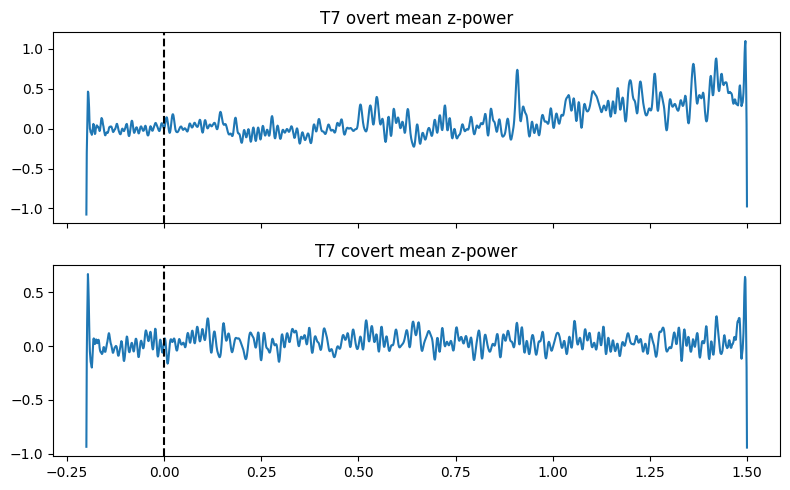

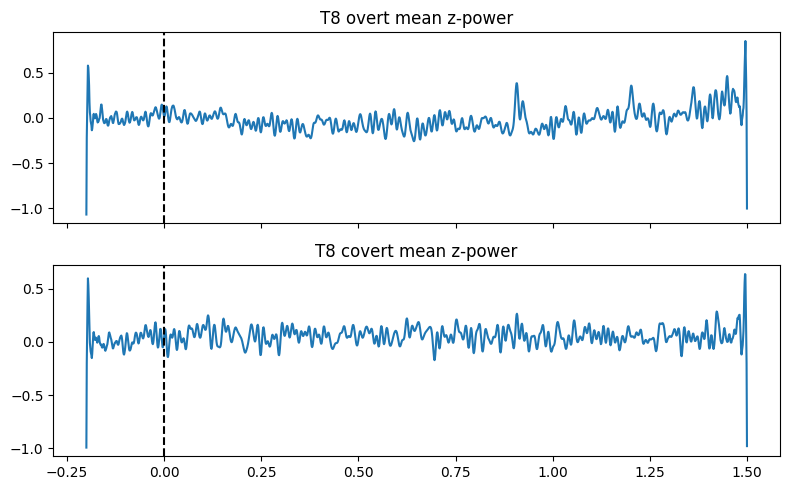

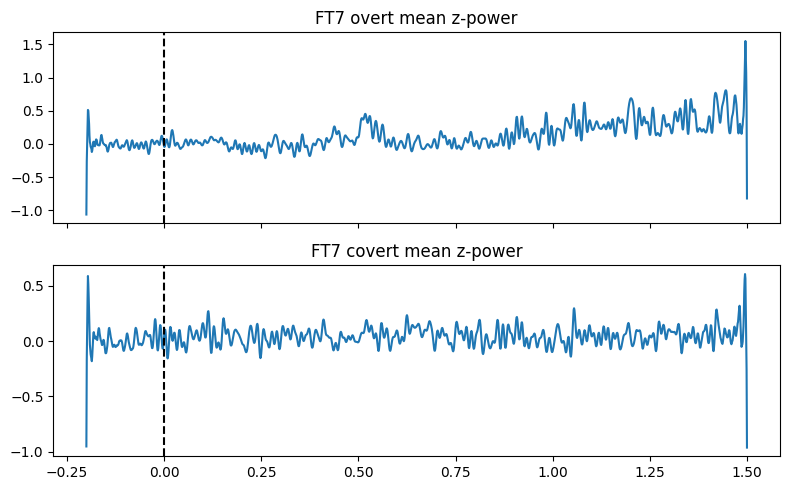

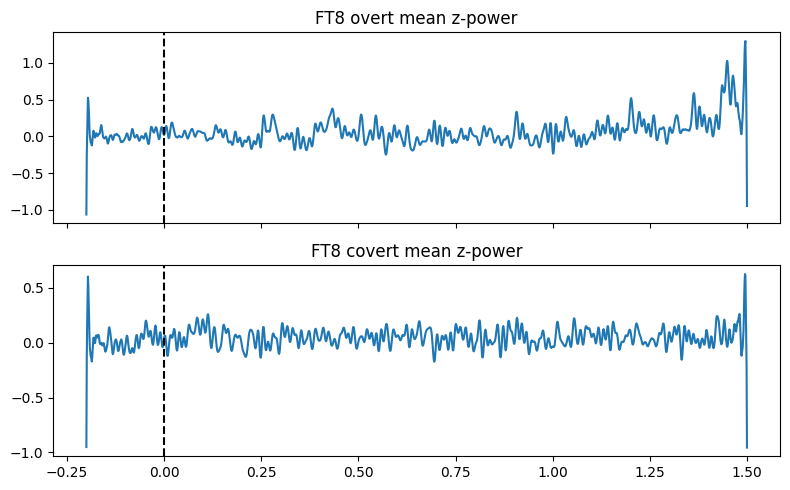

In [30]:
from matplotlib import pyplot as plt
for ch_idx, ch in enumerate(ch_names):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
    mean_overt = overt_z[:, ch_idx, :].mean(axis=0)
    mean_covert = covert_z[:, ch_idx, :].mean(axis=0)
    ax[0].plot(times, mean_overt); ax[0].axvline(0, color='k', linestyle='--'); ax[0].set_title(f'{ch} overt mean z-power')
    ax[1].plot(times, mean_covert); ax[1].axvline(0, color='k', linestyle='--'); ax[1].set_title(f'{ch} covert mean z-power')
    plt.tight_layout()

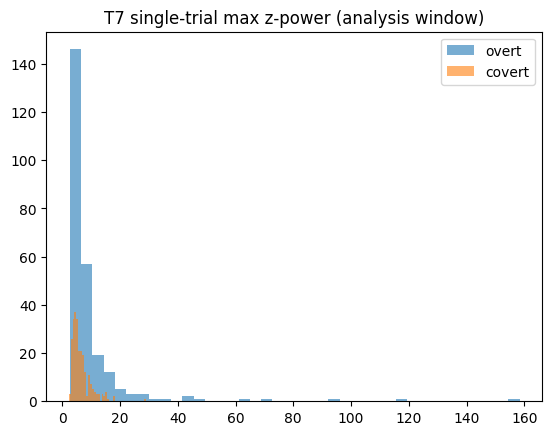

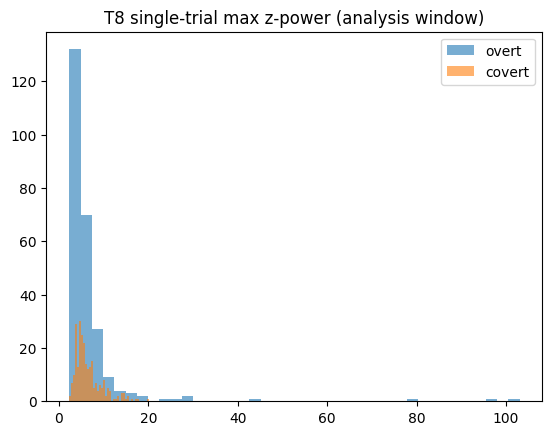

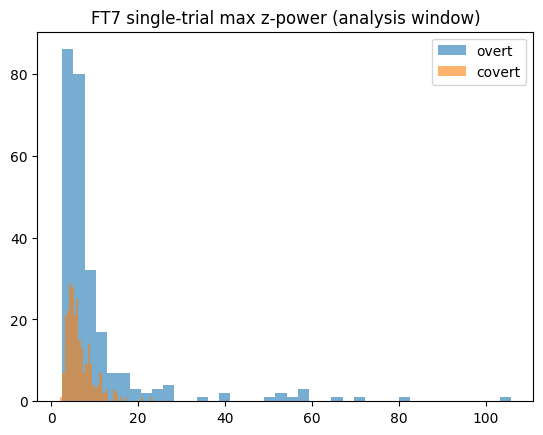

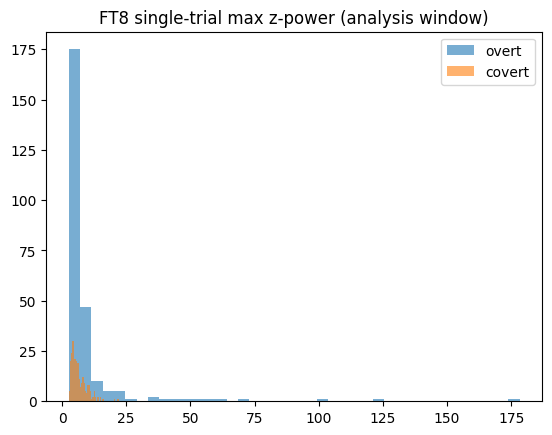

In [33]:
overt_max = overt_z[:, :,].max(axis=-1)  # (n_overt, n_ch)
covert_max = covert_z[:, :, ].max(axis=-1)  
for ch_idx, ch in enumerate(ch_names):
    plt.figure()
    plt.hist(overt_max[:, ch_idx], bins=40, alpha=0.6, label='overt')
    plt.hist(covert_max[:, ch_idx], bins=40, alpha=0.6, label='covert')
    plt.title(f'{ch} single-trial max z-power (analysis window)')
    plt.legend()

[2025-11-27 11:09:19] [INFO] ************************************************************
[2025-11-27 11:09:19] [INFO] ************************************************************
[2025-11-27 11:09:19] [INFO] ************************************************************
[2025-11-27 11:09:19] [INFO] ************************************************************
[2025-11-27 11:09:19] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-27 11:09:19] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-27 11:09:19] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-27 11:09:19] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-27 11:09:19] [INFO] ************************************************************
[2025-11-27 11:09:19] [INFO] ************************************************************
[2025-11-27 11:09:19] [INFO] ************************************************************
[2025-11-27 11:09:19] [INFO] *********************

Reading 0 ... 6306999  =      0.000 ...  6306.999 secs...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:44: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['EOG1', 'EOG2']
  self.raw_eeg = read_raw_bids(self.bidspath, verbose=False)
[2025-11-27 11:09:26] [INFO] Data read sucessfully
[2025-11-27 11:09:26] [INFO] Data read sucessfully
[2025-11-27 11:09:26] [INFO] Data read sucessfully
[2025-11-27 11:09:26] [INFO] Data read sucessfully
[2025-11-27 11:09:26] [INFO] ************************************************************
[2025-11-27 11:09:26] [INFO] ************************************************************
[2025-11-27 11:09:26] [INFO] ************************************************************
[2025-11-27 11:09:26] [INFO] ************************************************************
[2025-11-27 11:09:26] [INFO] **********Initializing Epoch Builder**********
[2025-11-27 11:09:26] [INFO] **********Initializing Epoch Builder**********
[2025-11-27 11:09:26] [INFO] **********Initializi

Extracting epochs from -0.5s to 1.5s...


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Speech     ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.5       ┃
┃ ⏳ Tmax            ┃ 1.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
255 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 255 events and 2001 original time points ...
0 bad epochs dropped


[2025-11-27 11:09:27] [INFO] Creating Epochs
[2025-11-27 11:09:27] [INFO] Creating Epochs
[2025-11-27 11:09:27] [INFO] Creating Epochs
[2025-11-27 11:09:27] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Speech     ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.5       ┃
┃ ⏳ Tmax            ┃ 1.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
255 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 255 events and 2001 original time points ...
0 bad epochs dropped
Computing High-Gamma Power...
Applying Baseline Z-score...
Running permutation tests on 4 channels...


/tmp/ipykernel_383123/522561434.py:149: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
/tmp/ipykernel_383123/522561434.py:149: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
/tmp/ipykernel_383123/522561434.py:149: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
/tmp/ipykernel_383123/522561434.py:149: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(


--- Channel T7 ---
  Lowest cluster p-value: 0.1960
  FDR Corrected significant? False (p=0.2613)


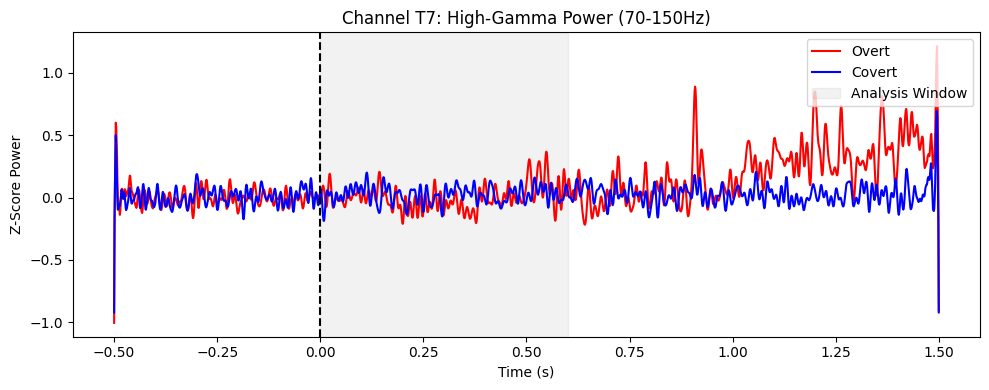

--- Channel T8 ---
  Lowest cluster p-value: 0.0010
  FDR Corrected significant? True (p=0.0040)


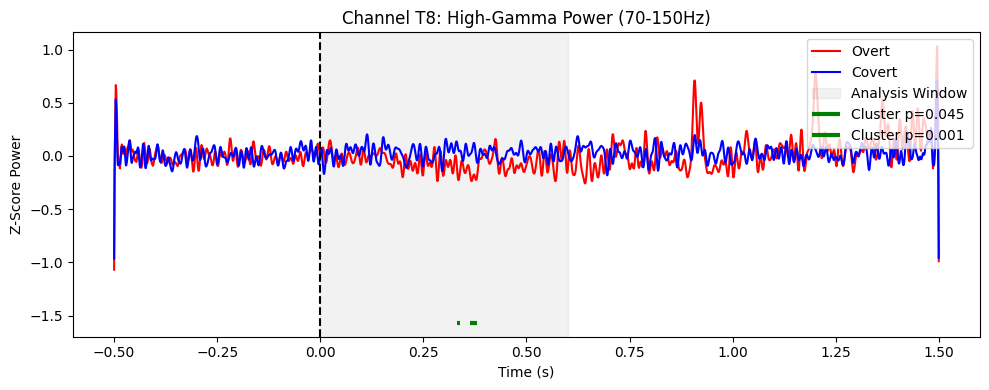

--- Channel FT7 ---
  Lowest cluster p-value: 0.4810
  FDR Corrected significant? False (p=0.4810)


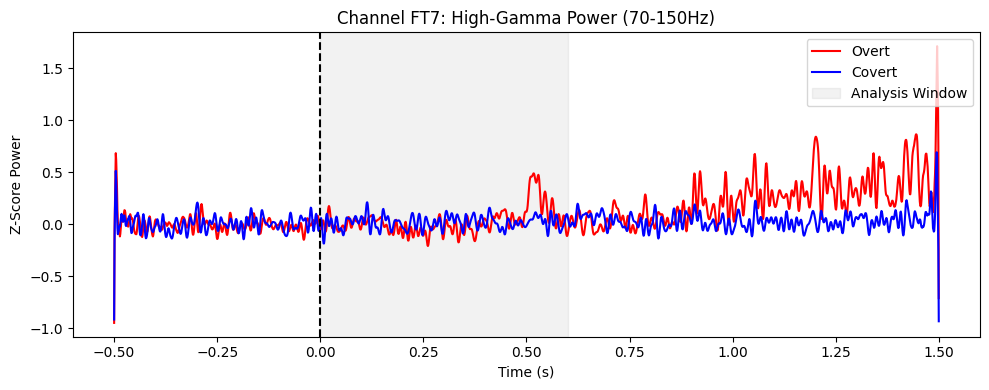

--- Channel FT8 ---
  Lowest cluster p-value: 0.0050
  FDR Corrected significant? True (p=0.0100)


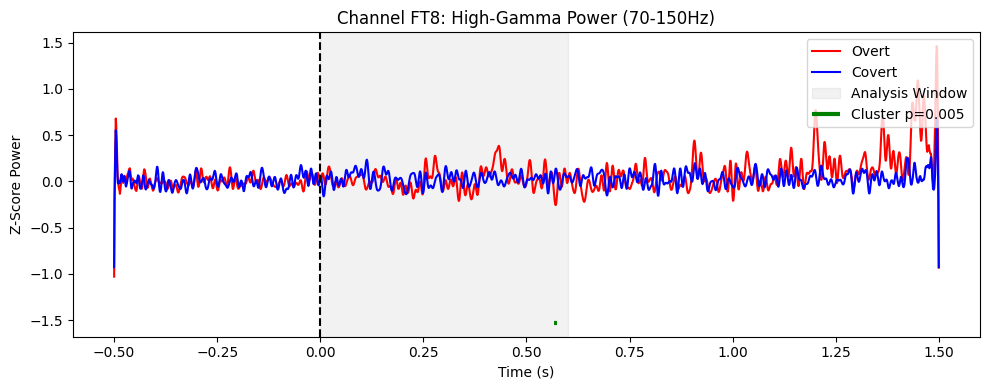

In [26]:
import numpy as np
import mne
from scipy.signal import hilbert
from mne.stats import permutation_cluster_test
from statsmodels.stats.multitest import fdrcorrection
from matplotlib import pyplot as plt

# Import your custom modules
from src.utils.logger import create_logger
from src.utils.data import load_yaml
from src.dataset.data_reader import BIDSDatasetReader
from src.dataset.eeg_epoch_builder import EEGEpochBuilder

# 1. Configuration
# ----------------
config_path = 'config.yaml'
subject = '01'
session = '01'

# Frequency band for EMG proxy (High Gamma)
hf_band = (70, 150)

# Time definitions
# CRITICAL FIX: tmin must be equal to or earlier than baseline start
tmin_epoch = -0.5   
tmax_epoch = 1.5
baseline_window = (-0.5, -0.1)  # Baseline for Z-scoring
analysis_window = (0.0, 0.6)    # Window for statistical testing

ch_names = ['T7', 'T8', 'FT7', 'FT8']
n_permutations = 1000 

# 2. Load Data
# ------------
config = load_yaml(config_path)
logger = create_logger('test')

reader = BIDSDatasetReader(
    logger=logger, config=config, subject=subject, session=session
)
reader._load_raw()
eeg = reader.raw_eeg

# 3. Epoch Creation
# -----------------
# Initialize Builders
overt_builder = EEGEpochBuilder(
    eeg_data=eeg, trial_mode='Real', trial_unit='Words',
    trial_boundary='Start', experiment_mode='Experiment', trial_type='Speech',
    modality='', channels=ch_names, logger=logger
)

covert_builder = EEGEpochBuilder(
    eeg_data=eeg, trial_mode='Silent', trial_unit='Words',
    trial_boundary='Start', experiment_mode='Experiment', trial_type='Speech',
    modality='', channels=ch_names, logger=logger
)

# Generate Epochs with corrected timing
print(f"Extracting epochs from {tmin_epoch}s to {tmax_epoch}s...")
overt_epochs = overt_builder.create_epochs(tmin=tmin_epoch, tmax=tmax_epoch)
covert_epochs = covert_builder.create_epochs(tmin=tmin_epoch, tmax=tmax_epoch)

# Get sampling frequency and time vector
sfreq = overt_epochs.info['sfreq']
times = overt_epochs.times

# 4. Signal Processing Functions
# ------------------------------
def get_hf_power(epochs, l_freq, h_freq, sfreq):
    """
    Filters data to high-gamma band, applies Hilbert transform, 
    and calculates analytic amplitude squared (power).
    """
    # Data shape: (n_epochs, n_channels, n_times)
    data = epochs.get_data(copy=True) 
    n_epochs, n_ch, n_times = data.shape
    
    # Flatten to (n_signals, n_times) for filtering
    data_reshaped = data.reshape(n_epochs * n_ch, n_times)
    
    # Bandpass Filter (FIR)
    filt = mne.filter.filter_data(
        data_reshaped, sfreq=sfreq, l_freq=l_freq, h_freq=h_freq,
        method='fir', verbose=False
    )
    
    # Reshape back
    filt = filt.reshape(n_epochs, n_ch, n_times)
    
    # Hilbert -> Analytic Signal -> Power
    analytic = hilbert(filt, axis=-1)
    power = np.abs(analytic) ** 2
    return power

def apply_zscore(power_data, times, base_win):
    """
    Z-scores power data relative to the mean/std of the baseline window
    calculated for *each trial* individually.
    """
    # Find indices for baseline
    b_mask = (times >= base_win[0]) & (times <= base_win[1])
    
    if not np.any(b_mask):
        raise ValueError(f"Baseline window {base_win} is outside data range {times[0]} to {times[-1]}")

    # Calculate stats across time axis (last axis) within the baseline window
    # mean/std shape: (n_epochs, n_ch, 1)
    base_mean = power_data[:, :, b_mask].mean(axis=-1, keepdims=True)
    base_std = power_data[:, :, b_mask].std(axis=-1, keepdims=True)
    
    # Prevent division by zero
    base_std[base_std == 0] = 1e-12
    
    return (power_data - base_mean) / base_std

# 5. Compute Z-Power
# ------------------
print("Computing High-Gamma Power...")
overt_power = get_hf_power(overt_epochs, hf_band[0], hf_band[1], sfreq)
covert_power = get_hf_power(covert_epochs, hf_band[0], hf_band[1], sfreq)

print("Applying Baseline Z-score...")
overt_z = apply_zscore(overt_power, times, baseline_window)
covert_z = apply_zscore(covert_power, times, baseline_window)

# 6. Statistical Analysis
# -----------------------
# Indices for the analysis window (0.0 to 0.6s)
a_mask = (times >= analysis_window[0]) & (times <= analysis_window[1])
times_analysis = times[a_mask]

results = {}
min_p_values = []

print(f"Running permutation tests on {len(ch_names)} channels...")

for ch_idx, ch in enumerate(ch_names):
    # Prepare data: List of arrays [Condition A, Condition B]
    # Slicing: All epochs, specific channel, analysis time window
    # Input shape per array: (n_observations, n_time_points)
    X = [
        overt_z[:, ch_idx, a_mask], 
        covert_z[:, ch_idx, a_mask]
    ]
    
    # Run Cluster Permutation Test
    # Uses F-test statistic by default for 2 groups
    F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
        X, n_permutations=n_permutations, n_jobs=1, 
        out_type='mask', seed=42, verbose=False
    )
    
    results[ch] = {
        'clusters': clusters,
        'p_values': cluster_p_values
    }
    
    # Store min p-value for FDR correction later
    if len(cluster_p_values) > 0:
        min_p_values.append(cluster_p_values.min())
    else:
        min_p_values.append(1.0)

# 7. Results & Visualization
# --------------------------
# FDR Correction across channels
reject, pvals_corrected = fdrcorrection(min_p_values, alpha=0.05)

for i, ch in enumerate(ch_names):
    print(f"--- Channel {ch} ---")
    print(f"  Lowest cluster p-value: {min_p_values[i]:.4f}")
    print(f"  FDR Corrected significant? {reject[i]} (p={pvals_corrected[i]:.4f})")
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Mean across epochs
    mean_overt = overt_z[:, i, :].mean(axis=0)
    mean_covert = covert_z[:, i, :].mean(axis=0)
    
    ax.plot(times, mean_overt, label='Overt', color='red')
    ax.plot(times, mean_covert, label='Covert', color='blue')
    
    # Highlight Analysis Window
    ax.axvspan(analysis_window[0], analysis_window[1], color='gray', alpha=0.1, label='Analysis Window')
    ax.axvline(0, color='k', linestyle='--')
    
    # Highlight Significant Clusters (uncorrected p < 0.05 for visualization)
    for c, p in zip(results[ch]['clusters'], results[ch]['p_values']):
        if p <= 0.05:
            # Map analysis mask indices back to global time indices
            # a_mask is boolean, np.where gets indices relative to full time array
            # c is boolean mask relative to analysis window
            
            # Create a time vector just for the analysis window to plot the cluster bar
            cluster_times = times_analysis[c]
            if len(cluster_times) > 0:
                ax.hlines(y=min(mean_overt.min(), mean_covert.min()) - 0.5, 
                          xmin=cluster_times[0], xmax=cluster_times[-1], 
                          linewidth=3, color='green', label=f'Cluster p={p:.3f}')

    ax.set_title(f'Channel {ch}: High-Gamma Power (70-150Hz)')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Z-Score Power')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()